In [13]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
from gpbenchmarks import get_data

from experiment_settings import functions


In [14]:
functions

[('nguyenf4', <tengp.parameters.Parameters at 0x7f1ca2458c18>, [-1, 1, 20]),
 ('nguyenf7', <tengp.parameters.Parameters at 0x7f1ca2458c18>, [0, 2, 20]),
 ('nguyenf10', <tengp.parameters.Parameters at 0x7f1ca2458c50>, [-1, 1, 100]),
 ('pagie1', <tengp.parameters.Parameters at 0x7f1ca2458cf8>, [-5, 5, 25]),
 ('keijzer6', <tengp.parameters.Parameters at 0x7f1ca2458d30>, [1, 50, 50]),
 ('korns12',
  [-50, 50, 10000]),
 ('vladislasleva4',
  [-0.05, 6.05, 1024])]

In [15]:
import pygmo as pg

In [16]:
vectors = []
n_actives = []

class cost_function:
    def __init__(self, X, Y, params, bounds):
        self.params = params
        self.bounds = bounds
        self.X = X
        self.Y = Y
    
    def fitness(self, x):
        #vectors.append(x)
        
        individual = tengp.individual.NPIndividual(list(x), self.bounds, self.params)
        pred = individual.transform(self.X)
        
        #n_actives.append(len(individual.active_nodes))
        
        try:
            return [mean_squared_error(pred, self.Y)]
        except ValueError:
            return [10000000000]
        
    def get_bounds(self):
        max_back = 10
        lower = [0]*len(self.bounds)

        for i in range(len(lower)):
            if i % 3 == 0:
                continue
            
            lower[i] = self.bounds[i] - max_back
            
            if lower[i] < 0:
                lower[i] = 0
                
        lower[-1] = self.bounds[-1] - max_back
        
        return (lower, [b for b in self.bounds])

In [18]:
%%time
results = []
champions = []

for f in functions:
    print(f[0])
    x, y = get_data(f[0], *f[2])
    x = np.c_[np.ones(len(x)), x]
    bounds = tengp.individual.IndividualBuilder(f[1]).create().bounds[:]

    prob = pg.problem(cost_function(x, y, f[1], bounds))
    
    problem_results = []
    pg.set_global_rng_seed(42)
    for i in range(100):
        print(i, end=', ')
        algo = pg.algorithm(pg.pso(
            gen=200,
#             eta1=0.1,
#             eta2=4
#             omega=0.4,
#             max_vel=1
             variant=6,
             neighb_type=3
        ))
        algo.set_verbosity(1)
        pop = pg.population(prob, 50)
        pop = algo.evolve(pop)
        problem_results.append(pop.champion_f[0])
        champions.append(pop.champion_x)
    results.append(problem_results)
    

nguyenf4
0, 

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:100: RuntimeWarning: invalid value encountered in multiply
  U = (1-c)*x_l2 + c*x_u2
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:17: RuntimeWarning: invalid value encountered in cos
  return np.cos(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:14: RuntimeWarning: invalid value encountered in sin
  return np.sin(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: invalid value encountered in true_divide
  return np.divide(x, y, ou

1, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in multiply
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:125: RuntimeWarning: invalid value encountered in add
  value = (1-coeff)*self.nodes[lower].value + coeff*self.nodes[upper].value


2, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:99: RuntimeWarning: invalid value encountered in add
  L = (1-b)*x_l1 + b*x_u1


3, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: invalid value encountered in add
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in add
  u = a*f_u(L, U)


4, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:100: RuntimeWarning: invalid value encountered in add
  U = (1-c)*x_l2 + c*x_u2


5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, nguyenf7
0, 1, 2, 3, 4, 5, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: invalid value encountered in multiply
  l = (1-a)*f_l(L, U)


6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, nguyenf10
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 

/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


21, 22, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:125: RuntimeWarning: overflow encountered in multiply
  value = (1-coeff)*self.nodes[lower].value + coeff*self.nodes[upper].value


23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, pagie1
0, 

/mnt/c/Users/jarinov-notas/dev/gp-benchmarks/gpbenchmarks/pagie_functions.py:4: RuntimeWarning: divide by zero encountered in power
  return 1/(1 + x**(-4))  + 1/(1 + y**(-4))
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: invalid value encountered in power
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in power
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: overflow encountered in power
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in power
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:41: RuntimeWarning: divide by zero encountered in reciprocal
  

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: overflow encountered in add
  l = (1-a)*f_l(L, U)


12, 13, 14, 15, 16, 17, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in add
  u = a*f_u(L, U)


18, 19, 20, 21, 22, 

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:41: RuntimeWarning: overflow encountered in reciprocal
  return x**(-1)


23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, keijzer6
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, korns12
0, 

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:38: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:23: RuntimeWarning: overflow encountered in square
  return x**2
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:26: RuntimeWarning: overflow encountered in power
  return x**3
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:29: RuntimeWarning: invalid value encountered in tan
  return np.tan(x)
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


1, 2, 3, 4, 5, 6, 7, 8, 9, 

KeyboardInterrupt: 

In [19]:
def plot_results(outs):
    costs = np.array(outs)
    print('min:', np.min(costs))
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    sns.distplot(costs, kde=False);

Nguyen4
min: 0.5418394788380374
mean: 1.8673435591498206
median: 2.0268605563779247
variance: 0.16855432844912754


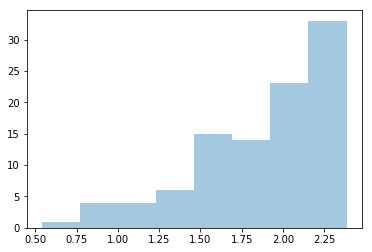

In [20]:
print('Nguyen4')
plot_results(results[0])

Nguyen7
min: 0.05804242318994496
mean: 0.6105678248872057
median: 0.7316894668644263
variance: 0.03728129788859001


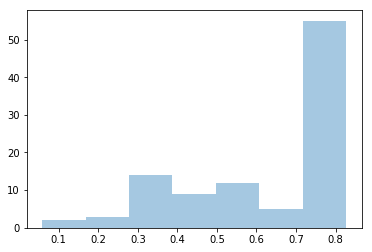

In [21]:
print('Nguyen7')
plot_results(results[1])

Nguyen10
min: 0.09364688297106792
mean: 0.2102733186742505
median: 0.19714625934385593
variance: 0.004246570788223528


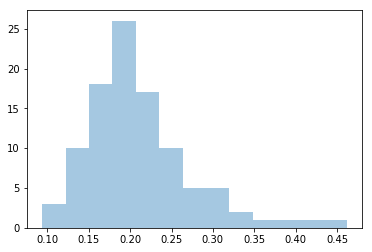

In [22]:
print('Nguyen10')
plot_results(results[2])

Korns12
min: 0.212951594653528
mean: 44.66422889213843
median: 1.2357542109859132
variance: 52267.80113332249


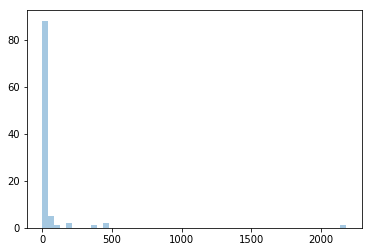

In [23]:
print('Korns12')
plot_results(results[3])

In [ ]:
return 10 / ( 5 + np.sum([(x - 3)**2 for x in [x1, x2, x3, x4, x5]]))